# Hierarchical clustering

---

In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
sns.set_style("darkgrid")

plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (13, 7)})

## Agglomerative method 
At the start, treat each data point as one cluster. Form more clusters by joining the two closest clusters.

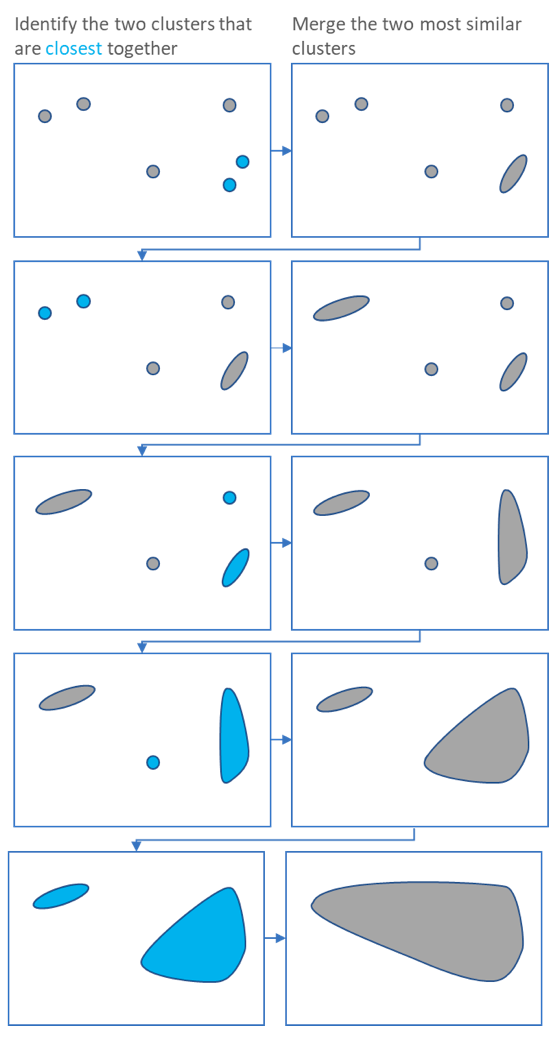

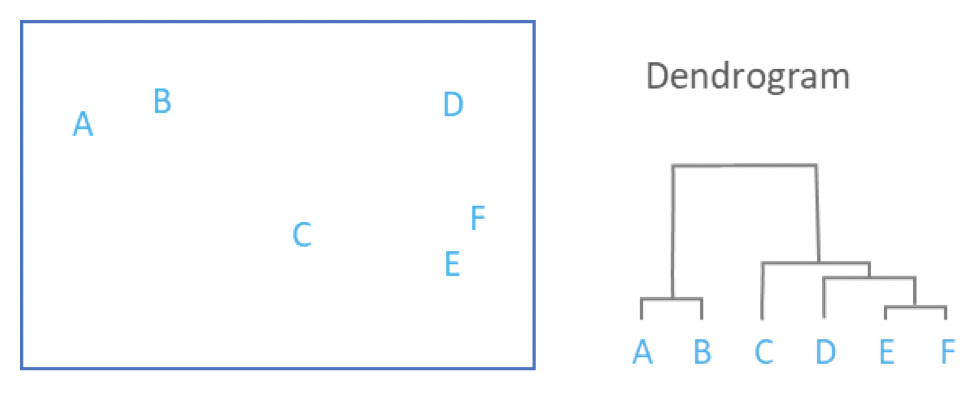

<div style="text-align: center;"> 🔵 Images from: https://www.displayr.com/what-is-hierarchical-clustering</div>

### 1) How to measure the distance between observations?

Manhattan metric:

$d(\textbf{x}, \textbf{y}) = \sum_{i=1}^n\left|x_i - y_i\right|$

Euclidean metric: 

$d(\textbf{x}, \textbf{y}) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}$

More $\ldots$

### 2) How to measure the distance between clusters?

Suppose we have $|u|$ points $u[0], \ldots, u[|u|-1]$ in cluster $u$ and $|v|$ points $v[0], \ldots, v[|v|-1]$ in cluster $v$. Let us assume that the $s$ and $t$ clusters / vectors together form the $u$ cluster, and the $v$ cluster is separate from $u$. Then the distances $d(u, v)$ between the $u$ cluster and the $v$ cluster can be calculated according to the following linkage methods:

<br>
Single: $\quad \quad D(u, v) = \operatorname{min}(d(u[i], v[j])), \quad \forall i \in u, j \in v$

Complete: $\quad D(u, v) = \operatorname{max}(d(u[i], v[j])), \quad \forall i \in u, j \in v$

Average: $\; \quad D(u, v) = \sum_{ij}\frac{d(u[i], v[j])}{|u| \cdot |v|}$
			
Weighted: $\quad D(u, v) = \frac{D(s, v) + D(t, v)}{2}$
			
Ward's: $\; \; \; \quad D(u, v) = \sqrt{\frac{|v| + |s|}{T}d(v, s)^2 + \frac{|v| + |t|}{T}d(v, t)^2 - \frac{|v|}{T}d(s, t)^2}, \quad $
where $T = |v| + |s| + |t|$


More $\ldots$


---

<img src="./media/linkage_comparison.png" alt="drawing" width="700"/>

<div style="text-align: center;"> 🔵 Image from: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering</div>

## Example – 2 dimensions

In [114]:
data = np.random.rand(15, 2)
distance = 1.5

data[5:10] = data[5:10] + distance
data[10:] = data[10:] - distance
data

array([[ 0.72113929,  0.1425477 ],
       [ 0.70677889,  0.82766159],
       [ 0.10945573,  0.48561438],
       [ 0.24542199,  0.88007707],
       [ 0.30016721,  0.31176402],
       [ 2.38650917,  1.95725332],
       [ 1.72150274,  2.33932103],
       [ 1.94454921,  2.16861907],
       [ 1.77967405,  2.440874  ],
       [ 2.36400834,  1.76813589],
       [-0.92548911, -0.72896857],
       [-0.5761948 , -0.95693228],
       [-0.7338008 , -1.10569789],
       [-1.2656787 , -0.56344736],
       [-1.33783887, -0.73685844]])

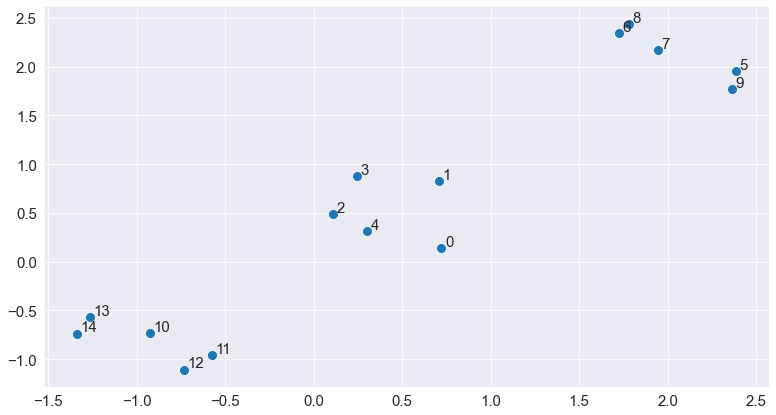

In [115]:
sns.scatterplot(x=data[:,0], y=data[:,1], s=100)

for index, point in enumerate(data):
    plt.annotate(index, xy=point + 0.02)

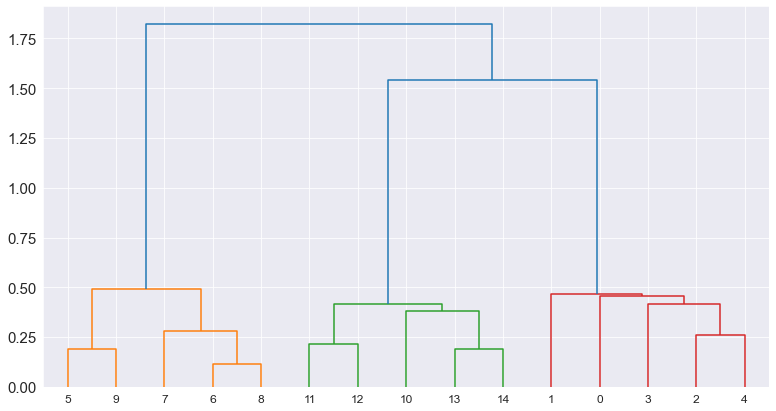

In [116]:
linked = shc.linkage(data, 'single')
shc.dendrogram(linked);

## Example 2 – more dimensions

In [170]:
data = np.random.rand(60, 10)
difference_strength = 3

data[20:40] = data[20:40] + np.random.rand(20, 10) * difference_strength
data[40:] = data[40:] - np.random.rand(20, 10) * difference_strength
np.random.shuffle(data)

<AxesSubplot:>

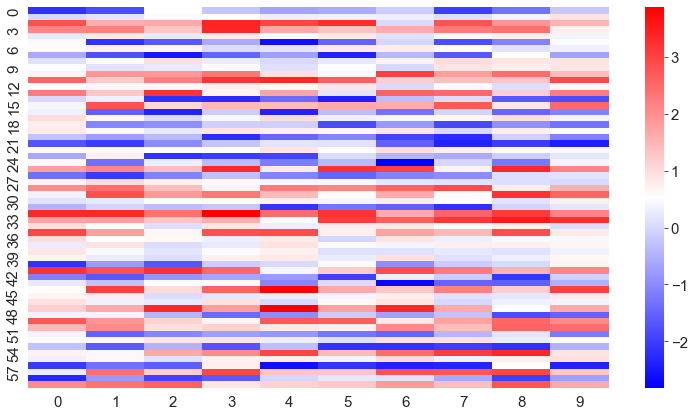

In [171]:
sns.heatmap(data, cmap="bwr")

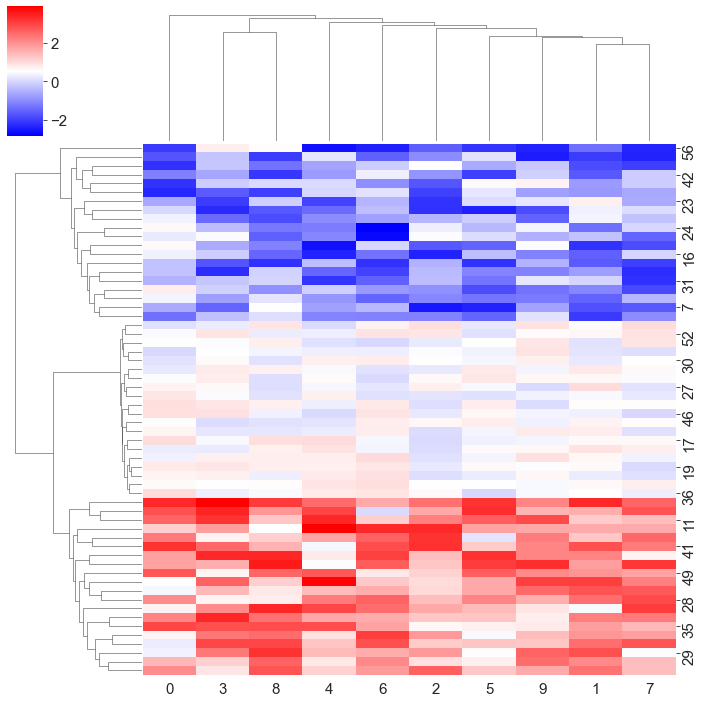

In [172]:
sns.clustermap(data, cmap="bwr")

## Example 3 - real data

In [74]:
url = "https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv"
df = pd.read_csv(url)

In [75]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

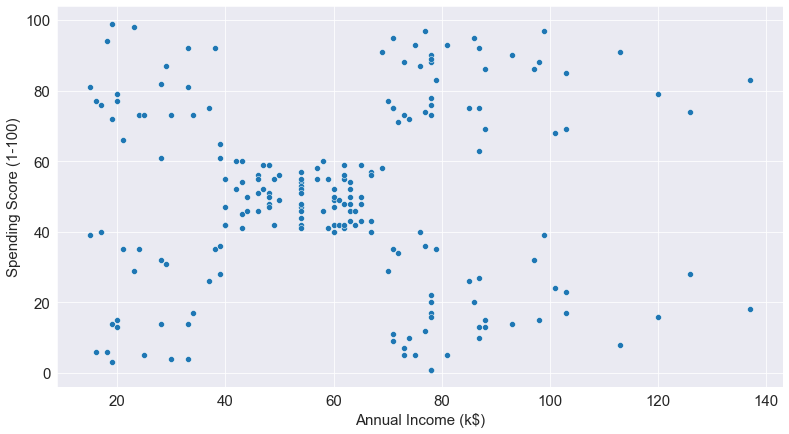

In [109]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

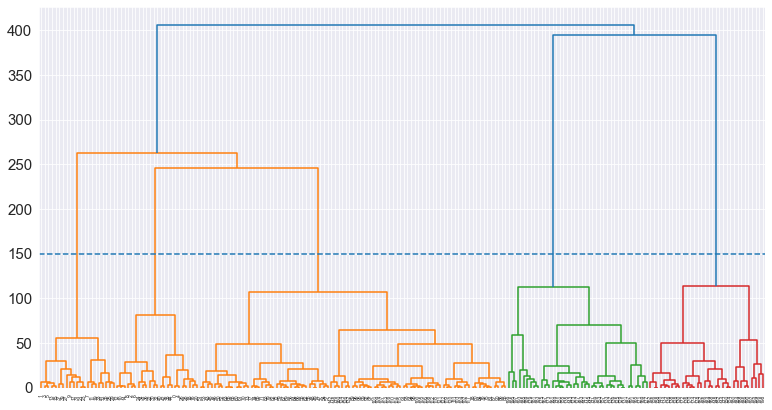

In [125]:
linked = shc.linkage(df, "ward")
shc.dendrogram(linked);
plt.axhline(150, linestyle="--");

In [122]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

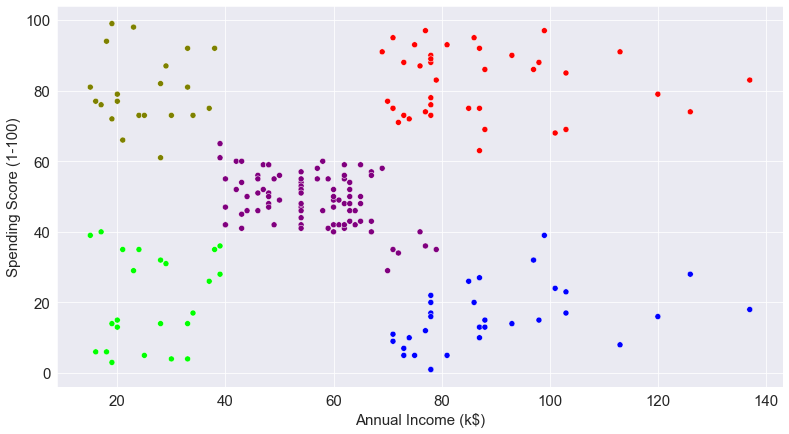

In [124]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", c=cluster.labels_, cmap="brg");

In [ ]:
data